# **HOMEWORK 1 (110 points + 1) : CAUTION! CONTENTS ARE HOT** 🌋
## **DUE: *SEPTEMBER 18, 2025 @ 11:59 PM***
## **24-HR LATE DUE DATE WITH A 15% PENALTY: *SEPTEMBER 19, 2025 @ 11:59 PM***

The [NCEI/WDS Global Significant Volcanic Eruptions Database](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ngdc.mgg.hazards:G10147) is a very comprehensive collection of +600 volcanic eruptions dating from 4360 BC to the present. Due to the nature of this assignment, we will be dealing with relatively newer volcanoes (in which some are still obviously still older than anyone on Earth currently). Each eruption in the database is classified as significant if it meets one or more criteria, such as causing fatalities, incurring **damage on property** (**+$1 million**), reaching a **Volcanic Explosivity Index (VEI)** of **6 or higher**, generating a tsunami, or being linked to a significant earthquake. The VEI is a scale that measures the explosiveness of volcanic eruptions, providing insight into the magnitude and potential consequences of the eruptions. The database includes detailed information on the location, type of volcano, last known eruption, VEI, casualties, property damage, and much more.
![volcano](https://wikitravel.org/upload/shared//9/99/Volcano_de_Fuego_Banner.jpg)
**We are going to dive straight into these volcanoes (well... their dataset), to swim our way into Pandas proficiency!**

You will find the [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html) helpful. There are also some helpful links to guide you along the way! Don't get burned 🔥



# **For this assignment, we are including a special bonus question to help everyone get familiar with the proper assignment submission routine. We strongly encourage you to complete Bonus Question 1, learn the process, and follow this practice for all future assignments.**

# **For this assignment only, you will not lose points if you skip the bonus question. However, starting from Homework 2, submitting both the Jupyter Notebook file and the PDF will be required in order to receive full credit.**

### **DO NOT REMOVE ANY PART OF ANY OF THE QUESTIONS OR YOU LOSE CREDIT**
### *No Hardcoding either*  😋❤️‍🔥
### **REMEMBER TO SHOW OUTPUT**


### **Part 1: Maintenance 🤩 (25 POINTS TOTAL)**
First, we're going to familiarize ourselves with the process. As in most languages, Python looks best when its modules are imported first before any other code is written ✨

In [25]:
# Make sure these code blocks run properly and that you have properly installed the appropriate modules required.
import pandas as pd
import requests
# import other libraries here

# Don't Remove this
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

As you may have noticed, there's another library aside from Pandas called "[requests](https://requests.readthedocs.io/en/latest/)." **The requests library allows you to send HTTP requests to a server, retrieve the content, and process it at ease.** It's very beginner friendly for those attempting to get into webscraping (super important for collecting and creating datasets). We also recommend looking into [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/) (yeah, soup LOL), another wonderful library that can be paired with the requests library for webscraping.

As shown below, sometimes specific websites require specific headers in order to process a request to access the data.

To check if a request was processed successfully, use the [status_code](https://requests.readthedocs.io/en/latest/api/) function to see if the process returned 200.

In [26]:
# API URL and headers in case request gets denied.
api_url = "https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/volcanoes"

headers = {
    'accept': '*/*'
}

#### **TASK 1.0: Cute Webscraping (5 points)**
To make our cute webscraper we need to **create a GET request** using the relevant information given above.

This particular dataset NOAA returns data from the API as ***json*** when a user makes a request. The json data has a particular format, so we will extract our needed information only from the field called **items** to make a dataframe.

**After properly scraping the data, name this dataframe** ***df***

**Save this dataframe into a CSV file named 'volcanoes.csv'**

**You won't need to run this more than once**

In [27]:
response = requests.get(api_url, headers=headers)
response.raise_for_status

data = response.json()

items = data["items"]
df = pd.DataFrame(items)
df.to_csv("volcanoes.csv", index = False)

#### **TASK 1.1: 1 Liner Thingz (3 points)**

We need to get an idea of what this dataset is going to look. In order to do that, let's take a look at some of the most [basic things](https://dataanalytics.buffalostate.edu/pandas-cheat-sheet) our dataframe has.

**Read the directions carefully and code your answer with only one line of code.**

***CAN'T USE LOOPS. DO NOT DISPLAY THE DATAFRAME, JUST YOUR CODE OUTPUT HERE.***

**1.1.1:** In one line of code and **using only one single method call**, output the **summary statistics** (count, mean, std, min, max, quartiles) of all numerical features in the dataframe.

*Hint: Look for a method that gives a descriptive overview of numerical columns.*

In [28]:
df.describe()

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,latitude,longitude,elevation,deathsTotal,deathsAmountOrderTotal,damageAmountOrderTotal,vei,deathsAmountOrder,damageAmountOrder,housesDestroyedAmountOrderTotal,deaths,injuries,injuriesAmountOrder,injuriesTotal,injuriesAmountOrderTotal,housesDestroyedAmountOrder,housesDestroyed,housesDestroyedTotal,missingAmountOrder,missingAmountOrderTotal,missing,missingTotal,damageMillionsDollars,damageMillionsDollarsTotal
count,200.000000,200.000000,177.000000,155.000000,37.000000,17.000000,200.000000,200.000000,200.000000,200.000000,200.000000,128.000000,180.000000,59.000000,192.000000,169.000000,51.000000,52.000000,118.000000,30.000000,39.000000,33.000000,41.000000,42.000000,13.000000,16.000000,3.0,3.0,1.0,1.0,1.00,1.0
mean,375.635000,1809.800000,6.293785,15.825806,1818.648649,3632.117647,57207.110000,258519.715000,5.852440,103.641705,1835.110000,1028.007812,1.677778,2.084746,2.692708,1.609467,1.823529,2.403846,429.483051,90.400000,1.589744,113.060606,1.682927,2.309524,1102.000000,1326.312500,2.0,2.0,78.0,78.0,0.04,19.0
std,306.114755,248.034282,3.469611,9.185073,1742.563313,3015.859162,24461.022227,20706.407256,18.170994,48.350940,1032.617325,5692.045543,1.039207,0.952096,0.956843,0.994703,0.931791,0.995275,1513.433735,210.136507,0.849704,227.506310,0.878608,1.047368,2451.426863,2568.800543,1.0,1.0,NaN,NaN,NaN,NaN
min,1.000000,-141.000000,1.000000,1.000000,61.000000,421.000000,10101.000000,211010.000000,-38.157000,-175.630000,-5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,1.0,1.0,78.0,78.0,0.04,19.0
25%,78.500000,1774.500000,3.000000,8.000000,613.000000,1328.000000,60325.000000,263250.000000,-7.935000,111.847000,1117.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.750000,3.000000,5.250000,1.000000,6.000000,1.000000,1.000000,50.000000,68.750000,1.5,1.5,78.0,78.0,0.04,19.0
50%,348.000000,1880.500000,7.000000,15.000000,1181.000000,2179.000000,60403.000000,264015.000000,0.320000,121.299500,1714.000000,18.000000,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,13.500000,21.500000,1.000000,26.000000,1.000000,2.500000,144.000000,215.500000,2.0,2.0,78.0,78.0,0.04,19.0
75%,664.250000,1950.000000,9.000000,24.000000,1977.000000,6195.000000,60807.000000,268070.000000,14.011000,127.332000,2805.000000,104.250000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,78.500000,54.500000,2.000000,86.000000,2.000000,3.000000,800.000000,877.250000,2.5,2.5,78.0,78.0,0.04,19.0
max,994.000000,1996.000000,12.000000,31.000000,5863.000000,10519.000000,201141.000000,282110.000000,40.827000,177.180000,3657.000000,60000.000000,4.000000,4.000000,7.000000,4.000000,4.000000,4.000000,11000.000000,1000.000000,4.000000,1000.000000,4.000000,4.000000,9000.000000,9000.000000,3.0,3.0,78.0,78.0,0.04,19.0


**1.1.2:** In one line of code and **using only one single method call**, print the **summary information** of the dataframe, including index dtype, column names, non-null counts, and memory usage.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               200 non-null    int64  
 1   year                             200 non-null    int64  
 2   month                            177 non-null    float64
 3   day                              155 non-null    float64
 4   tsunamiEventId                   37 non-null     float64
 5   earthquakeEventId                17 non-null     float64
 6   volcanoLocationId                200 non-null    int64  
 7   volcanoLocationNewNum            200 non-null    int64  
 8   volcanoLocationNum               200 non-null    object 
 9   name                             200 non-null    object 
 10  location                         200 non-null    object 
 11  country                          200 non-null    object 
 12  latitude              

We won't be using some of the data because there is a lot of missing data.

**1.1.3:** *In one line of code, create a **new dataframe** called **new_df** that **discards** all the features of the **old** dataframe **except for the following**:*

`id,	year, month, day,	tsunamiEventId, earthquakeEventId, volcanoLocationId, volcanoLocationNewNum, name, country, elevation, morphology, deathsTotal, vei, deaths`

*Hint: Don't use any drop function*

In [30]:
new_df = df[["id",	"year","month", "day","tsunamiEventId", "earthquakeEventId", "volcanoLocationId", "volcanoLocationNewNum", "name", "country", "elevation", "morphology", "deathsTotal", "vei", "deaths"]]


#### **TASK 1.2: 1 Liner Shenaniganz (7 points)**

We're going to tidy up the **new dataframe** a little more with some more advanced 1 liner code.

**Read the directions carefully and code your answer with only one line of code.**

**For this section, keep the method of display that is already in the box. Write your code as indicated.**

***YOU CAN'T USE ONE LINE LOOPS OR ANY KIND OF LOOP.***

**1.2.1:** *In one line of code, **drop any row** that contains **NaN** in **any one** of the columns indicating a measure of **time**.*

In [31]:
new_df.dropna(subset=["year", "month", "day"])

,id,year,month,day,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths
0,1,1169,2.0,4.0,2852.0,421.0,10106,211060,Etna,Italy,3357,Stratovolcano,16000.0,NaN,NaN
1,2,1329,7.0,15.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,3.0,NaN
3,4,1888,3.0,13.0,1175.0,NaN,50107,251070,Ritter Island,Papua New Guinea,75,Stratovolcano,NaN,2.0,NaN
5,6,1832,11.0,1.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,NaN,2.0,NaN
6,7,1977,1.0,10.0,NaN,NaN,20303,223030,Nyiragongo,"Congo, DRC",3470,Stratovolcano,NaN,1.0,NaN
8,9,1779,8.0,8.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,NaN,3.0,NaN
10,11,1907,8.0,4.0,NaN,NaN,201112,221112,Alayta,Ethiopia,1496,Shield volcano,NaN,2.0,NaN
11,12,1905,3.0,10.0,NaN,NaN,10102,211020,Vesuvius,Italy,1281,Complex volcano,1.0,2.0,1.0
12,13,1986,7.0,24.0,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0
13,14,1536,3.0,26.0,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,1.0,3.0,1.0


**1.2.2:** *In one line of code, **change** the **index column** of the dataframe so that it has **1-based indexing**.*

In [32]:
new_df.index = range(1, len(df) + 1)

The **deathsTotal** and **deaths**  columns have approximations of the same data with alternating NaNs in each.

**1.2.3:** *In one line of code, make a **new column** called **'totalDeaths'** that takes the **max** of the values given between those* ***two*** *columns.
- If there is **NaN** in ***one column*** and a **numerical** value in the **other**, it will ***take the numerical value***.
- **Only** if there are **NaNs** in ***both columns***, the **new column will have NaN.**

In [33]:
new_df = new_df.copy()
new_df["totalDeaths"] = new_df[["deathsTotal" , "deaths"]].max(axis=1, skipna=True)


#### **TASK 1.3: Tailoring Time (10 Points)**
It's pretty obvious that the year, month, and day look pretty weird in the dataset. We're going to have to do some hardcore cleaning on the [time](https://pandas.pydata.org/docs/user_guide/timeseries.html).

**We need to have only ONE column called** "***date***" **that contains the full date (YYYY-MM-DD), not separated into three columns.**

***Make sure there are no floating point values in the date and sort the data from most recent to least.***

***Remove the old columns and place the new column next to the 'id' column.***


**YOU CAN USE MULTIPLE LINES OF CODE BUT CAN'T USE LOOPS.**

**Note:** It is alright to have only a **maximum of 12 NaTs** for some dates that often go further back than the 1600s because the datetime module in Pandas has a limit (unless otherwise guided).

In [34]:
new_df["date"] = pd.to_datetime(
    new_df["year"].astype("Int64").astype(str) + "-" +
    new_df["month"].astype("Int64").astype(str) + "-" +
    new_df["day"].astype("Int64").astype(str),
    errors="coerce"
)
# Drop original columns and sort.
new_df = new_df.drop(columns=["year", "month", "day"])
new_df = new_df.sort_values(by="date", ascending=False).reset_index(drop=True)

# Place new column next to 'id' column.
date_col = new_df.pop("date")
new_df.insert(1, "date", date_col)

# KEEP THIS. It will display the whole dataframe.
#print(new_df["date"].isna().sum()) this is returning 58 but idk why; apparently datetime has issues with years before the 1680s?

new_df

/var/folders/s6/6wkkjw292p9f2tzrykqt_fsh0000gn/T/ipykernel_67107/1409316121.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_df["date"] = pd.to_datetime(


,id,date,tsunamiEventId,earthquakeEventId,volcanoLocationId,volcanoLocationNewNum,name,country,elevation,morphology,deathsTotal,vei,deaths,totalDeaths
0,693,1996-08-10,NaN,NaN,70202,272020,Kanlaon,Philippines,2422,Stratovolcano,3.0,2.0,3.0,3.0
1,112,1994-11-22,NaN,NaN,60325,263250,Merapi,Indonesia,2910,Stratovolcano,66.0,3.0,66.0,66.0
2,933,1991-06-03,NaN,NaN,80210,282100,Unzendake,Japan,1483,Complex volcano,43.0,1.0,43.0,43.0
3,144,1990-02-10,NaN,NaN,60328,263280,Kelud,Indonesia,1730,Stratovolcano,35.0,4.0,35.0,35.0
4,486,1988-05-09,NaN,NaN,60509,265090,Banda Api,Pacific Ocean,596,Caldera,4.0,3.0,4.0,4.0
5,31,1987-04-17,NaN,NaN,10106,211060,Etna,Italy,3357,Stratovolcano,2.0,2.0,2.0,2.0
6,111,1986-12-31,NaN,NaN,60325,263250,Merapi,Indonesia,2910,Stratovolcano,1.0,2.0,1.0,1.0
7,13,1986-07-24,NaN,NaN,10104,211040,Stromboli,Italy,924,Stratovolcano,1.0,2.0,1.0,1.0
8,203,1985-05-10,NaN,NaN,60330,263300,Semeru,Indonesia,3657,Stratovolcano,70.0,3.0,70.0,70.0
9,739,1984-09-09,NaN,NaN,70303,273030,Mayon,Philippines,2462,Stratovolcano,1.0,3.0,1.0,1.0


### **Part 2: Volcanic Matryoshkas 🪆 (30 POINTS TOTAL)**

Now, that most of the data has been tidied up. We will organize the data into more sizable pieces of information in order to extract useful information.

**2.1.1:** *(10 points here)*

Use the **groupby function in Pandas** to create separate dataframes for each unique country.

* **Each table must only have the columns**: 'date' 'country', 'name', and 'vei' (Having the index is ok. Up to you.)

* **Sort** the dataframe of **each country** by **highest to lowest 'vei'**

* Use the **[display](https://ipython.readthedocs.io/en/8.26.0/api/generated/IPython.display.html)** function to show **each sorted table**

**You MUST use the groupby function here and display your results.**

In [35]:
from IPython.display import display

subset = new_df[["date", "country", "name", "vei"]]
for country, group in subset.groupby("country"):
    sorted_group = group.sort_values(by="vei", ascending=False)
    display(sorted_group)

,date,country,name,vei
10,1984-08-15,Cameroon,Oku Volcanic Field,NaN


,date,country,name,vei
77,1904-02-25,Comoros,Karthala,2.0
144,NaT,Comoros,Karthala,2.0


,date,country,name,vei
70,1912-12-03,"Congo, DRC",Nyamulagira,3.0
20,1977-01-10,"Congo, DRC",Nyiragongo,1.0


,date,country,name,vei
75,1907-08-04,Ethiopia,Alayta,2.0
153,NaT,Ethiopia,Dama Ali,NaN


,date,country,name,vei
61,1926-01-23,Greece,Santorini,2.0


,date,country,name,vei
119,1815-04-10,Indonesia,Tambora,7.0
37,1963-03-18,Indonesia,Agung,5.0
181,NaT,Indonesia,Gamkonora,5.0
166,NaT,Indonesia,Raung,5.0
161,NaT,Indonesia,Kelud,5.0
103,1861-12-29,Indonesia,Kie Besi,4.0
44,1951-08-31,Indonesia,Kelud,4.0
64,1919-05-19,Indonesia,Kelud,4.0
94,1872-11-03,Indonesia,Merapi,4.0
3,1990-02-10,Indonesia,Kelud,4.0


,date,country,name,vei
151,NaT,Italy,Campi Flegrei,3.0
127,1779-08-08,Italy,Vesuvius,3.0
15,1979-09-12,Italy,Etna,3.0
51,1944-03-27,Italy,Vesuvius,3.0
58,1930-09-11,Italy,Stromboli,3.0
148,NaT,Italy,Etna,3.0
63,1919-05-22,Italy,Stromboli,3.0
146,NaT,Italy,Vesuvius,3.0
95,1872-04-24,Italy,Vesuvius,3.0
143,NaT,Italy,Etna,3.0


,date,country,name,vei
193,NaT,Japan,Aira,5.0
56,1933-12-24,Japan,Kuchinoerabujima,4.0
67,1914-01-12,Japan,Aira,4.0
125,1781-04-11,Japan,Aira,4.0
126,1779-11-08,Japan,Aira,4.0
191,NaT,Japan,Aira,4.0
134,1717-02-07,Japan,Kirishimayama,3.0
135,1716-11-09,Japan,Kirishimayama,3.0
41,1955-10-13,Japan,Aira,3.0
192,NaT,Japan,Aira,3.0


,date,country,name,vei
65,1917-04-01,New Zealand,Okataina,1.0
78,1903-08-30,New Zealand,Okataina,1.0
66,1914-09-10,New Zealand,Whakaari/White Island,NaN


,date,country,name,vei
140,1692-06-04,Pacific Ocean,Serua,4.0
175,NaT,Pacific Ocean,Teon,4.0
176,NaT,Pacific Ocean,Teon,4.0
4,1988-05-09,Pacific Ocean,Banda Api,3.0
139,1694-11-20,Pacific Ocean,Banda Api,3.0
177,NaT,Pacific Ocean,Banda Api,3.0
178,NaT,Pacific Ocean,Banda Api,3.0
117,1820-06-11,Pacific Ocean,Banda Api,2.0


,date,country,name,vei
90,1878-02-04,Papua New Guinea,Rabaul,3.0
16,1979-03-08,Papua New Guinea,Karkar,2.0
42,1954-08-03,Papua New Guinea,Bam,2.0
81,1895-06-17,Papua New Guinea,Karkar,2.0
86,1888-03-13,Papua New Guinea,Ritter Island,2.0
145,NaT,Papua New Guinea,Rabaul,2.0
149,NaT,Papua New Guinea,Manam,2.0


,date,country,name,vei
131,1754-11-28,Philippines,Taal,4.0
32,1965-09-28,Philippines,Taal,4.0
136,1716-09-24,Philippines,Taal,4.0
120,1814-02-01,Philippines,Mayon,4.0
72,1911-01-30,Philippines,Taal,3.0
97,1871-12-08,Philippines,Mayon,3.0
130,1766-07-20,Philippines,Mayon,3.0
9,1984-09-09,Philippines,Mayon,3.0
87,1887-03-09,Philippines,Mayon,3.0
80,1897-05-23,Philippines,Mayon,3.0


,date,country,name,vei
150,NaT,Reunion,"Fournaise, Piton de la",2.0


,date,country,name,vei
105,1853-10-29,Taiwan,Unnamed,2.0


,date,country,name,vei
88,1886-08-31,Tonga,Niuafo'ou,4.0
107,1853-06-24,Tonga,Niuafo'ou,0.0


**2.1.2:** *(5 points here)*

Using **groupby again**, print out the **maximum 'vei'** for **each unique country.**

**You MUST use the groupby function here and print your results.**

* **Print** out your results in a format like the following: "Country: {country_name}, Highest VEI: {vei}"

In [36]:
max_vei = new_df.groupby("country")["vei"].max()

for country, vei in max_vei.items():
    print(f"Country: {country}, Highest VEI: {vei}")

Country: Cameroon, Highest VEI: nan
Country: Comoros, Highest VEI: 2.0
Country: Congo, DRC, Highest VEI: 3.0
Country: Ethiopia, Highest VEI: 2.0
Country: Greece, Highest VEI: 2.0
Country: Indonesia, Highest VEI: 7.0
Country: Italy, Highest VEI: 3.0
Country: Japan, Highest VEI: 5.0
Country: New Zealand, Highest VEI: 1.0
Country: Pacific Ocean, Highest VEI: 4.0
Country: Papua New Guinea, Highest VEI: 3.0
Country: Philippines, Highest VEI: 4.0
Country: Reunion, Highest VEI: 2.0
Country: Taiwan, Highest VEI: 2.0
Country: Tonga, Highest VEI: 4.0


Finally, we have ALMOST REACHED THE END!!
Since there is still quite a bit of missing data, we want to make use of what is still available.

A very powerful tool in Python's magnificent collection of libraries is its beautiful graphing tools.

Check out libraries such as [Seaborn](https://seaborn.pydata.org/) or [Matplotlib](https://matplotlib.org/stable/index.html) to create meaningful visualizations! **Your final task in this section requires the use of these libraries**

**2.1.3:** *(15 points here)*

- Based on the **unique names of volcanoes**, **filter names that have more than 4 datapoints under their name.**
- Each datapoint in the dataframe refers to a recorded instance of a volcanic eruption.
- Make **separate line graphs for each volcano** and **plot their VEIs over time.**

**Make sure to properly label all parts of the graph appropriately to receive credit 👀** (like title, axes, legend, etc...)

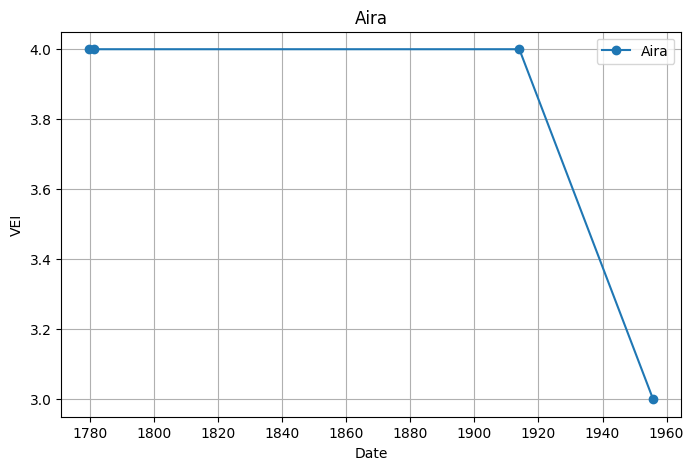

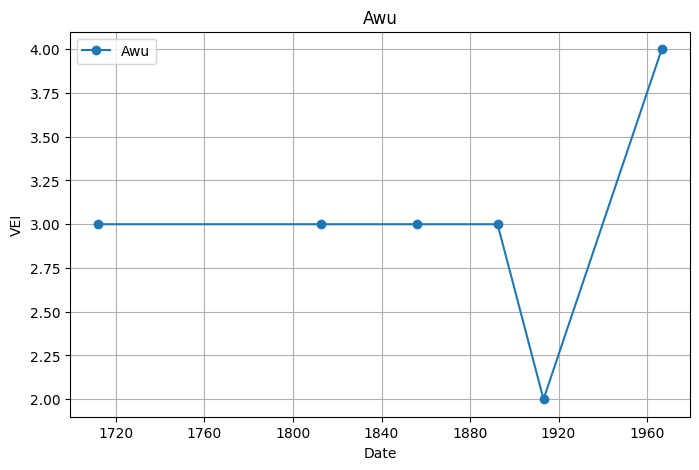

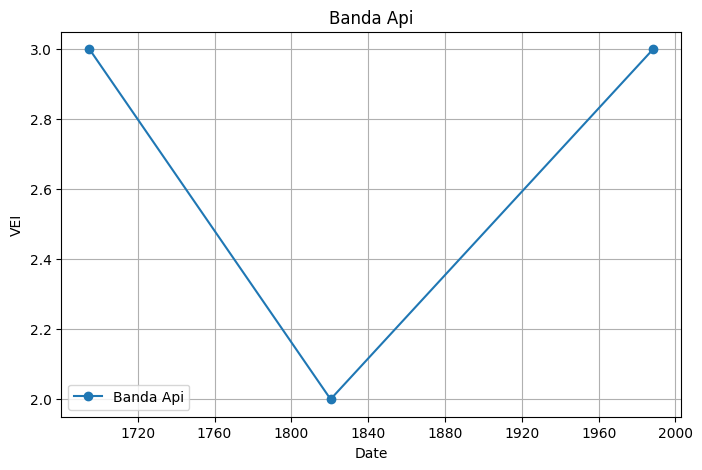

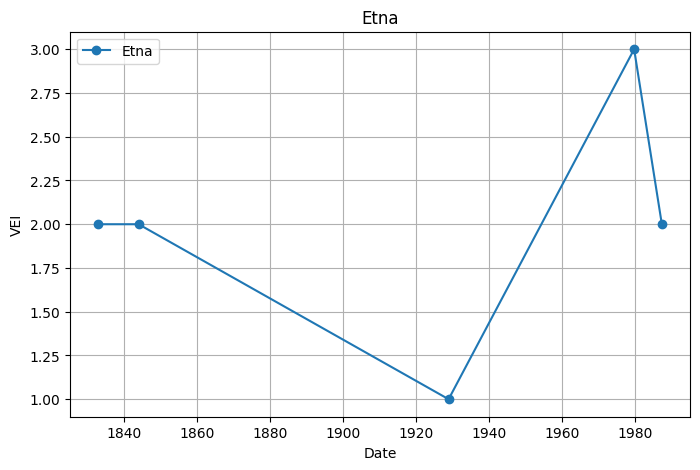

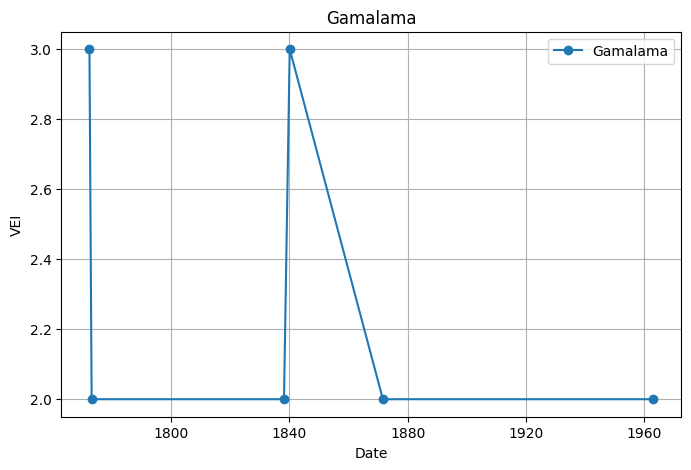

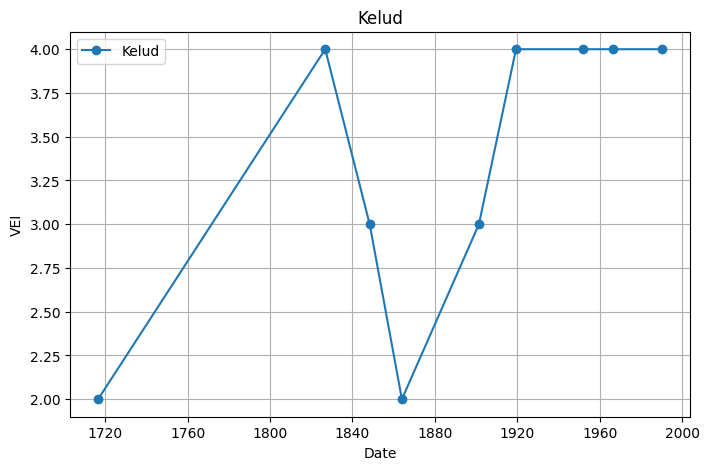

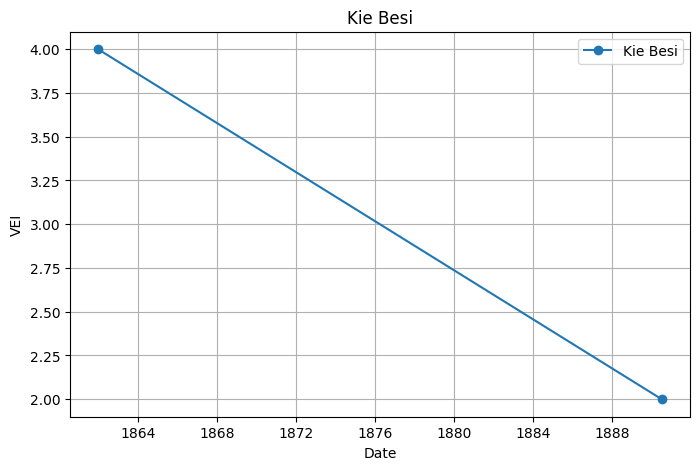

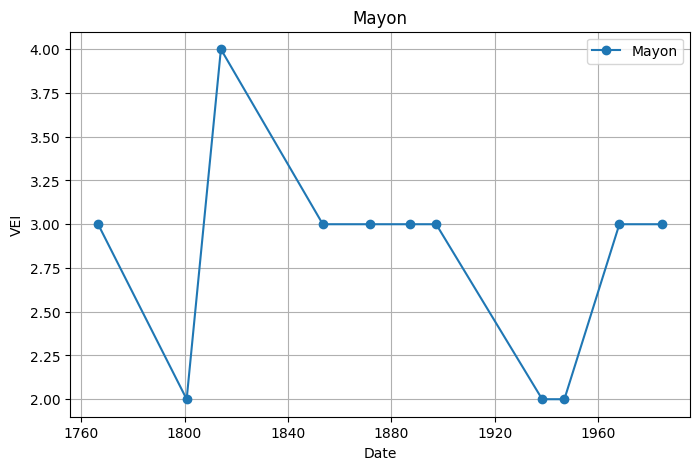

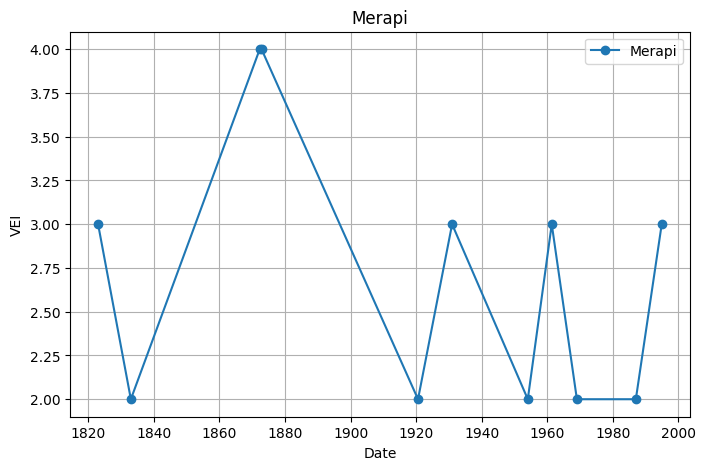

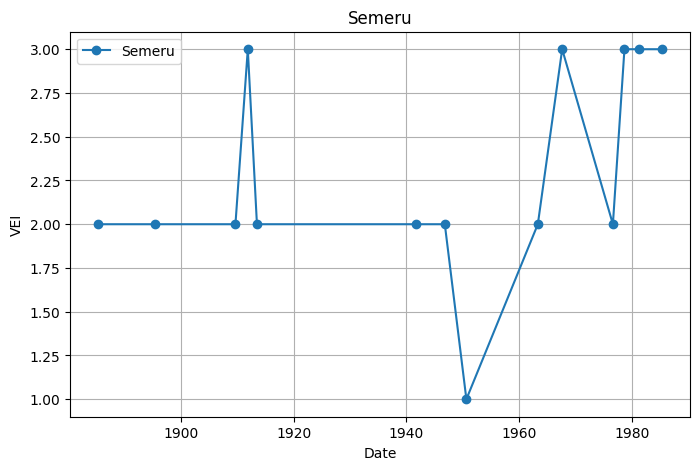

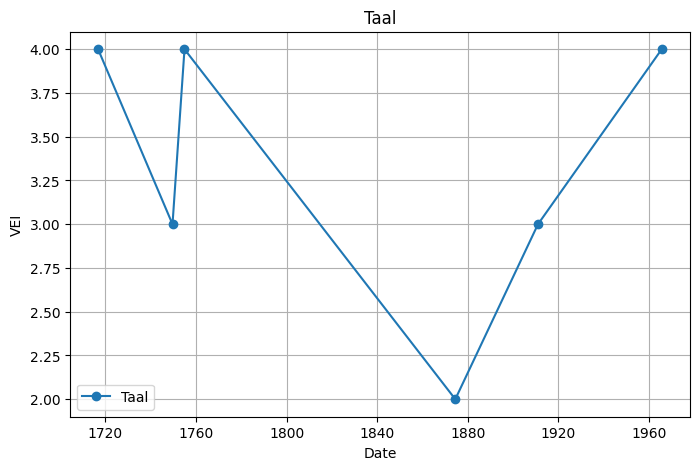

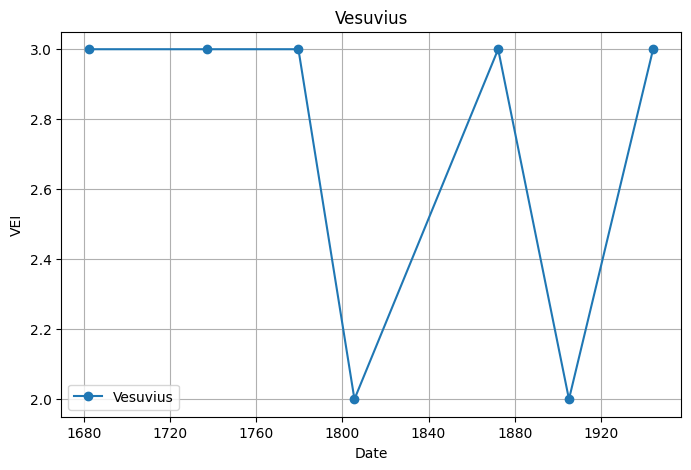

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
counts = new_df["name"].value_counts()
volcanoes = counts[counts>4].index.to_list()
filtered = new_df[new_df["name"].isin(volcanoes)]


# not adding the graphs here, but the graphs should have the volcano name as the title
# the x axis should be the years and the y axis should be the VEI
# A graph that doesn't have these things will only get partial points
for volcano, group in filtered.groupby("name"):
    group = group.dropna(subset=["vei", "date"])
    if group.empty:
        continue
    
    plt.figure(figsize=(8,5))
    plt.plot(group["date"], group["vei"], marker="o", linestyle="-", label=volcano)

    plt.title(f"{volcano}")
    plt.xlabel("Date")
    plt.ylabel("VEI")
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    plt.show()


### **Part 3: Fiery Jobs 🚒 (15 POINTS TOTAL)**

Proficiency in SQL is also super important. SQL databases are essentially relational databases in which there are vast amounts of tabular data. which can often be used to connect with related tablular data. [This](https://www.w3schools.com/sql/) is a pretty good intro into learning more about SQL.

Check out this [tutorial](https://mode.com/sql-tutorial/introduction-to-sql/) for some clarifications on SQL.

Now! We'll be using **`sqlite`** to access a database.
* **!!!IMPORTANT!!! PLEASE Start by downloading the sql lite file and putting it in the same directory as this [KAGGLE DATASET URL](https://www.kaggle.com/datasets/kaggle/sf-salaries) (hit the 'download' button in the upper right). You need an account in order to download the dataset.**
* Check out the description of the data so you know the table / column names.

The following code will use `sqlite3` to create a database connection. `sqlite3` is the library in Python that assists in navigating through SQL databases.

**Note:** If you are working on this assignment via Google Colab, sometimes the runtime resets and it will throw errors.

***Instead of running through the entire notebook, run the notebook from the following code block and onwards:***
- Click anywhere on the next code block.
- Go up to where it says **'Runtime'** in the toolbar (right under the title of the notebook and **in between 'Insert' and 'Tools'**)
- Hover over it and **click on the option** that says **'Run cell and below'**

In [2]:
import sqlite3
import pandas as pd # Pandas was already imported from the previous sections

conn = sqlite3.connect("database.sqlite")
crsr = conn.cursor()

## **!!!IMPORTANT!!! PLEASE Start by downloading the sql lite file and putting it in the same directory as this [KAGGLE DATASET URL](https://www.kaggle.com/datasets/kaggle/sf-salaries) (hit the 'download' button in the upper right). You need an account in order to download the dataset.**

##### If you cannot see anything when executing this code, that means you did not download the Kaggle dataset correctly.

In [4]:
# This code will let you check out the different tables within the database.
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = crsr.execute(query).fetchall()
print(tables)

[('Salaries',)]


#### **Remember that each problem should be solved with a single SQL query.**
**Note: All outputs must be shown**
- Only include whatever fields are mentioned throughout each question, nothing more and nothing less.
- Follow each instruction clearly

#### **3.1.1: 2 Points**
From the **Salaries** table, get the **average base pay** for firefighters (all job titles consisting of the word "firefighter" **(not case-sensitive)**) between the **years 2010 to 2015**.

*Remember that firefighters that also occupy other professions are still considered firefighters.*

*Hint: Look into [this](https://www.w3schools.com/mysql/mysql_wildcards.asp) 👀*

In [5]:
query = '''
SELECT AVG(BasePay) AS avg_base_pay
FROM Salaries
WHERE LOWER(JobTitle) LIKE '%firefighter%'
  AND Year BETWEEN 2010 AND 2015;
'''

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,avg_base_pay
0,101199.486996


#### **3.1.2: 2 Points**
From the **Salaries** table, get all the firefighters (all job titles consisting of the word "firefighter" **(not case-sensitive)**) in the **year 2011** making under **$40,000 as a base pay.** **Sort** them in **descending** order by their pay.

*Remember that firefighters that also occupy other professions are still considered firefighters.*

In [6]:
query = '''
SELECT EmployeeName, JobTitle, BasePay
FROM Salaries
WHERE LOWER(JobTitle) LIKE '%firefighter%'
  AND Year = 2011
  AND BasePay < 40000
ORDER BY BasePay DESC;
'''
# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,EmployeeName,JobTitle,BasePay
0,MEIBEK SCOTT-CHUNG,FIREFIGHTER,37495.09
1,LAURA ATTIA,FIREFIGHTER,35779.10
2,MICHAEL CUDDY,FIREFIGHTER,32058.01
3,FELIX DUAG,FIREFIGHTER,20658.44
4,DANIEL ARCINIEGA,FIREFIGHTER,13345.28
5,GREG BARRON,FIREFIGHTER,13046.35
6,JAMES MOORE,FIREFIGHTER,7896.00
7,ALLISON KALHAMMER,FIREFIGHTER,7477.60
8,DARREN MILLER,FIREFIGHTER,7477.60
9,MARTIN GREALISH,FIREFIGHTER,6880.50


#### **3.1.3: 4 Points**
From the **Salaries** table, first get the **averages** of **base pay**, **benefits**, and **overtime pay** for firefighters (all job titles consisting of the word "firefighter" **(not case-sensitive)**).

- Then, make a **column with the sum** of these **three averages**
- Finally, **exclude** job titles containing "FIREFIGHTER" **(case-sensitive)**

*Remember that firefighters that also occupy other professions are still considered firefighters.*

In [7]:
query = '''
SELECT 
    AVG(BasePay) AS avg_basepay,
    AVG(Benefits) AS avg_benefits,
    AVG(OvertimePay) AS avg_overtime,
    (AVG(BasePay) + AVG(Benefits) + AVG(OvertimePay)) AS total_avg
FROM Salaries
WHERE LOWER(JobTitle) LIKE '%firefighter%'
'''

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

,avg_basepay,avg_benefits,avg_overtime,total_avg
0,101199.486996,29404.01156,25932.604456,156536.103012


#### **3.1.4: 7 Points**

Finally, we'll make our own table in our database.

* Separate the **Salaries table** by **years (2010-2015)**, and add it back to the database.
- Using a loop might be helpful.

* You may use basic python to complete the task. However, using querying on SQL is **mandatory**.
* Feel free to **use multiple lines of code for this problem only.**

*Hint: Check [this](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html) out*

In [8]:
import pandas as pd

for year in range(2010, 2016):
    query = f"SELECT * FROM SALARIES WHERE Year = {year};"
    df_year = pd.read_sql(query,conn)
    
    table_name = f"Salaries_{year}"
    df_year.to_sql(table_name, conn, if_exists="replace", index=False)

In [9]:
# Run this code to check if you successfully added your table.
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Salaries',), ('Salaries_2010',), ('Salaries_2011',), ('Salaries_2012',), ('Salaries_2013',), ('Salaries_2014',), ('Salaries_2015',)]


![volcano](https://as1.ftcdn.net/v2/jpg/06/34/76/64/1000_F_634766457_0fZbpYj6aBLlldO1jADUPpKTRLnNmngs.jpg)

### **Part 4: Pandas 'Group By'(40 points)**



This flowchart is taken from our lecture class presentation and illustrates the process of transforming data using the Pandas GroupBy operation. First, the data is input, followed by applying the GroupBy function to one or more columns of the DataFrame. Once the data is grouped, an aggregation function (such as sum(), mean(), or count()) is applied to compute summary statistics for each group



![bonus](https://drive.google.com/uc?export=view&id=1OeO3cVJSgmk6QxeBUp5ojJQUGVAPB-Jx)



Your task is to translate the workflow shown in the flowchart into Pandas queries that perform these operations step by step.

**Notes:** Your task is to translate the workflow shown in the flowchart into Pandas queries. Ensure that the **exact input and exact output** from the flowchart are replicated using Pandas queries, step by step.

**4.1 (Point 10 )** Create a sample dataset that includes columns for account, order, and ext price.

In [ ]:
# Create the Sample dataset from above flowchart
input_data = {
    'account': ['383080', '383080', '383080', '412290', '412290','412290','412290','412290','218895','218895','218895','218895'],
    'order': ['10001', '10001', '10001', '10005', '10005','10005','10005','10005','10006','10006','10006','10006'],
    'ext_price': [235.83, 232.32, 107.97, 2679.36, 286.02, 832.95, 3472.04, 915.12, 3061.12, 518.65, 216.9, -72.18]
}

# Create DataFrame


# Display Dataframe (DONT REMOVE THE CODE)


**4.2 (Point 10+10 =20 )** Group by order and show the intermediate results

In [ ]:
# Group by 'order' and show intermediate result


# Display intermediate result for each group; hints: you have to use 'for loop'




**4.3 (Point 10 )** Apply the Sum Aggregation for Each Group

Now we'll apply the sum aggregation to get the total ext price for each order:

In [ ]:

# Repeat group by 'order' again and then apply aggregation (sum of 'ext_price' for each 'order')


# Show the aggregated result after re-grouping  (DONT REMOVE THE CODE)




**4.4 (Point 10)**  Combine the Results into One Final Table
Finally, we will **reset the index** and create a combined table that shows order and the sum of the ext price for each group:


**Notes**: In pandas, 'reset_index()' is a method used to reset the index of a DataFrame to its default integer-based index. By default, when you perform certain operations like groupby(), the resulting DataFrame may have a new index (e.g., the grouped column). The reset_index() method allows you to convert the current index back to a default sequential integer index and optionally, move the current index values into a regular column.


In [ ]:
# Reset index to combine result into a single DataFrame

# Rename the columns for clarity


# Show the final result  (DONT REMOVE THE CODE)


# Bonus(1 point): Assignment Submission with Jupyter Notebook file(ipynb) and PDF


In addition to the instruction of the special bonus question included exclusively in Assignment 1, we would like to highlight the importance of developing good practices for assignment submission in data science projects.

Think of yourself as a reviewer of your peers’ work: what would you pay attention to if you had to grade their assignments? Clearly, the raw dataset itself is not the main point—why would someone need to see every line of data you downloaded? Data science is about analysis and insight, not just data collection. What truly matters is how you analyze the data and how you present your results.

For a clean and effective submission, please avoid printing entire datasets unless they are directly relevant to the presentation of your output or if you are asked to do so. Instead, focus on:

*   Showing your algorithm with clear, concise code
*   Displaying the key results you want us to evaluate (or the outputs you relied on while working)
*   Adding a short explanation when asked to interpret your findings

For this bonus question, please submit both your .ipynb file and the PDF version. To create a PDF: go to File (top left corner in Jupyter Notebook) → Print → Destination → Save as PDF.

Are you noticing an overwhelming amount of unnecessary printed results in your PDF? This is exactly why we emphasize the importance of cleaning up your work before submission. Removing trivial data printing makes your notebook look much more professional and easier to review—just like proofreading an essay for good grammar.

Your Homework 1 submission should be lightweight and focused, since this is a starter project designed to help you ease into the semester. :)

This practice helps us grade more efficiently and ensures fairness, since we can always reference your original notebook if regrading is needed.